# Used Toyota Camry Price Analysis - Seattle

ZIP code 98107 is located in western Washington and covers a slightly less than average land area compared to other ZIP codes in the United States. It also has an extremely large population density. The number of people in their late 20s to early 40s is extremely large while the number of seniors is small. There are also an extremely large number of single adults and an extremely small number of families. The population density is 9,602 people per square mile. The median household income of $67,566 is compared to the rest of the country.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
#Create empty lists to store the data we are about to collect from the website
#We would like to collect the names of the cars, the mileage, the price, the rating, the number of reviews the car received

car_name = []
car_mileage = []
car_price = []
car_rating = []
car_ratingcount = []   

In [3]:
#We need to create a variable to stor the url of the website, I'm calling this variable website_url. We then need to send a request to the website
#and scrape multiple pages

for i in range(1,6):
    website_url ="https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=toyota&maximum_distance=20&mileage_max=&models[]=toyota-camry&monthly_payment=&page=" + str(i) + "&page_size=20&sort=best_match_desc&stock_type=used&trims[]=toyota-camry-le&year_max=&year_min=&zip=98107"
    
    #make request to the website
    web_request = requests.get(website_url)
    
    # Create an object to store the html elements of the request
    soup = BeautifulSoup(web_request.content,'html.parser')
    
    # Create a list that contains the results of the web page
    results_list = soup.find_all('div', {'class':'vehicle-card'})
    
    for i in results_list:
    
        #get the names of the cars. If the name of the car is not present, append 'n/a' to the list
        try:
            car_name.append(i.find('h2').get_text())
        except:
            car_name.append('n/a')

        #get the mileage of the cars
        try:
            car_mileage.append(i.find('div', {'class' : 'mileage'}).get_text())
        except:
            car_mileage.append('n/a')

        #get the price of the car
        try:
            car_price.append(i.find('span', {'class' : 'primary-price'}).get_text())
        except:
            car_price.append('n/a')

        #get the rating
        try:
            car_rating.append(i.find('span', {'class': 'sds-rating__count'}).get_text())
        except:
            car_rating.append('n/a')

        #get the number of reviews
        try:
            car_ratingcount.append(i.find('span', {'class': 'sds-rating__link'}).get_text())
        except:
            car_ratingcount.append('n/a')

In [4]:
# Create a DataFrame

car_info = pd.DataFrame({'Name': car_name, 'Mileage': car_mileage, 'Price': car_price, 'Rating': car_rating, 'Reviews': car_ratingcount})

In [5]:
#print the DataFrame
car_info

,Name,Mileage,Price,Rating,Reviews
0,2015 Toyota Camry SE,"42,411 mi.","$20,999",4.6,"(1,064 reviews)"
1,2017 Toyota Camry LE,"32,739 mi.","$19,999",2.9,(272 reviews)
2,2001 Toyota Camry LE,"190,249 mi.","$4,899",1.3,(51 reviews)
3,2018 Toyota Camry LE,"46,101 mi.","$27,888",4.6,"(1,036 reviews)"
4,2020 Toyota Camry LE,"34,164 mi.","$23,990",4.3,(989 reviews)
...,...,...,...,...,...
124,2011 Toyota Camry LE,"189,102 mi.","$10,987",n/a,n/a
125,2018 Toyota Camry LE,"47,782 mi.","$21,980",n/a,n/a
126,2017 Toyota Camry LE,"89,650 mi.","$18,799",n/a,n/a
127,2004 Toyota Camry LE,"96,612 mi.","$7,499",n/a,n/a


In [6]:
#Let's clean the data frame

#The first thing we should do is to edit the Reviews column

car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.strip('reviews)').strip('(')) #remove the word reviews and the parentheses
car_info['Rating'] = car_info['Rating'].apply(lambda x:x.replace('n/a', '0')) #remove 'n/a'
car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace('n/a', '0')) 
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace('mi.', '')) #remove 'mi.' from the mileage column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('$', '')) # remove the $ from the Price column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Price column
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Mileage column
car_info = car_info[car_info['Mileage'] != 'n/a']
car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Reviews column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('Not Priced', '0')) #there's one car where the value is 'not priced', this should be converted to a number

<ipython-input-6-b8c780eb1bca>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Reviews column
<ipython-input-6-b8c780eb1bca>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('Not Priced', '0')) #there's one car where the value is 'not priced', this should be converted to a number


In [7]:
car_info

,Name,Mileage,Price,Rating,Reviews
0,2015 Toyota Camry SE,42411,20999,4.6,1064
1,2017 Toyota Camry LE,32739,19999,2.9,272
2,2001 Toyota Camry LE,190249,4899,1.3,51
3,2018 Toyota Camry LE,46101,27888,4.6,1036
4,2020 Toyota Camry LE,34164,23990,4.3,989
...,...,...,...,...,...
124,2011 Toyota Camry LE,189102,10987,0,0
125,2018 Toyota Camry LE,47782,21980,0,0
126,2017 Toyota Camry LE,89650,18799,0,0
127,2004 Toyota Camry LE,96612,7499,0,0


In [8]:
car_info = car_info.drop_duplicates()
car_info

,Name,Mileage,Price,Rating,Reviews
0,2015 Toyota Camry SE,42411,20999,4.6,1064
1,2017 Toyota Camry LE,32739,19999,2.9,272
2,2001 Toyota Camry LE,190249,4899,1.3,51
3,2018 Toyota Camry LE,46101,27888,4.6,1036
4,2020 Toyota Camry LE,34164,23990,4.3,989
5,2006 Toyota Camry LE,78947,9995,3.5,59
6,2015 Toyota Camry LE,174357,11995,0,0
7,2010 Toyota Camry LE,135597,9490,0,5
8,2020 Toyota Camry LE,57314,21146,0,19
9,2016 Toyota Camry LE,67642,16995,3.2,386


In [9]:
#The Name column has a lot of important data on the Year, Company, Vehicle make and model

car_info[["Year", "Company", "Make", "Model"]] = car_info["Name"].str.split(" ", n=3, expand=True)

/Users/hsinhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
car_info

,Name,Mileage,Price,Rating,Reviews,Year,Company,Make,Model
0,2015 Toyota Camry SE,42411,20999,4.6,1064,2015,Toyota,Camry,SE
1,2017 Toyota Camry LE,32739,19999,2.9,272,2017,Toyota,Camry,LE
2,2001 Toyota Camry LE,190249,4899,1.3,51,2001,Toyota,Camry,LE
3,2018 Toyota Camry LE,46101,27888,4.6,1036,2018,Toyota,Camry,LE
4,2020 Toyota Camry LE,34164,23990,4.3,989,2020,Toyota,Camry,LE
5,2006 Toyota Camry LE,78947,9995,3.5,59,2006,Toyota,Camry,LE
6,2015 Toyota Camry LE,174357,11995,0,0,2015,Toyota,Camry,LE
7,2010 Toyota Camry LE,135597,9490,0,5,2010,Toyota,Camry,LE
8,2020 Toyota Camry LE,57314,21146,0,19,2020,Toyota,Camry,LE
9,2016 Toyota Camry LE,67642,16995,3.2,386,2016,Toyota,Camry,LE


In [11]:
# Drop the column Name and its no longer needed
car_info = car_info.drop(["Name"], axis = 1)

In [12]:
car_info

,Mileage,Price,Rating,Reviews,Year,Company,Make,Model
0,42411,20999,4.6,1064,2015,Toyota,Camry,SE
1,32739,19999,2.9,272,2017,Toyota,Camry,LE
2,190249,4899,1.3,51,2001,Toyota,Camry,LE
3,46101,27888,4.6,1036,2018,Toyota,Camry,LE
4,34164,23990,4.3,989,2020,Toyota,Camry,LE
5,78947,9995,3.5,59,2006,Toyota,Camry,LE
6,174357,11995,0,0,2015,Toyota,Camry,LE
7,135597,9490,0,5,2010,Toyota,Camry,LE
8,57314,21146,0,19,2020,Toyota,Camry,LE
9,67642,16995,3.2,386,2016,Toyota,Camry,LE


In [13]:
# I would like to chang ethe position of the columns
car_info = car_info[['Company', 'Rating', 'Reviews', 'Year', 'Price', 'Model', 'Make', 'Mileage']]
car_info

,Company,Rating,Reviews,Year,Price,Model,Make,Mileage
0,Toyota,4.6,1064,2015,20999,SE,Camry,42411
1,Toyota,2.9,272,2017,19999,LE,Camry,32739
2,Toyota,1.3,51,2001,4899,LE,Camry,190249
3,Toyota,4.6,1036,2018,27888,LE,Camry,46101
4,Toyota,4.3,989,2020,23990,LE,Camry,34164
5,Toyota,3.5,59,2006,9995,LE,Camry,78947
6,Toyota,0,0,2015,11995,LE,Camry,174357
7,Toyota,0,5,2010,9490,LE,Camry,135597
8,Toyota,0,19,2020,21146,LE,Camry,57314
9,Toyota,3.2,386,2016,16995,LE,Camry,67642


In [14]:
#You can export the DataFrame to excel if you choose to proceed with excel
car_info.to_excel('multiple_pages.xlsx', index = False)

In [15]:
#You can export the DataFrame to a csv file if needed
car_info.to_csv('multiple_pages.csv', index = False)

In [16]:
#Let's determine the datatypes for each column within our car_info DataFrame
car_info.dtypes

Company    object
Rating     object
Reviews    object
Year       object
Price      object
Model      object
Make       object
Mileage    object
dtype: object

In [17]:
#All of the columns are listed as objects. We need to change the datatypes for at least some of these columns

#Year should be converted to int
car_info["Year"] = car_info["Year"].astype(int)

In [18]:
car_info["Price"] = car_info["Price"].astype(float)

In [19]:
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace(',', ''))

In [20]:
car_info["Mileage"] = car_info["Mileage"].astype(float)

In [21]:
car_info["Rating"] = car_info["Rating"].astype(float)

In [22]:
car_info["Reviews"] = car_info["Reviews"].astype(int)

In [23]:
car_info.dtypes

Company     object
Rating     float64
Reviews      int64
Year         int64
Price      float64
Model       object
Make        object
Mileage    float64
dtype: object

In [24]:
car_info

,Company,Rating,Reviews,Year,Price,Model,Make,Mileage
0,Toyota,4.6,1064,2015,20999.0,SE,Camry,42411.0
1,Toyota,2.9,272,2017,19999.0,LE,Camry,32739.0
2,Toyota,1.3,51,2001,4899.0,LE,Camry,190249.0
3,Toyota,4.6,1036,2018,27888.0,LE,Camry,46101.0
4,Toyota,4.3,989,2020,23990.0,LE,Camry,34164.0
5,Toyota,3.5,59,2006,9995.0,LE,Camry,78947.0
6,Toyota,0.0,0,2015,11995.0,LE,Camry,174357.0
7,Toyota,0.0,5,2010,9490.0,LE,Camry,135597.0
8,Toyota,0.0,19,2020,21146.0,LE,Camry,57314.0
9,Toyota,3.2,386,2016,16995.0,LE,Camry,67642.0


In [25]:
#create a new column called Age (Current year - Year)
import datetime

current_year = datetime.datetime.now().year
car_info['Age'] = current_year - car_info['Year']

In [26]:
#average price
average_price = car_info['Price'].mean()
print("Average Price:", average_price)

Average Price: 15252.255319148937


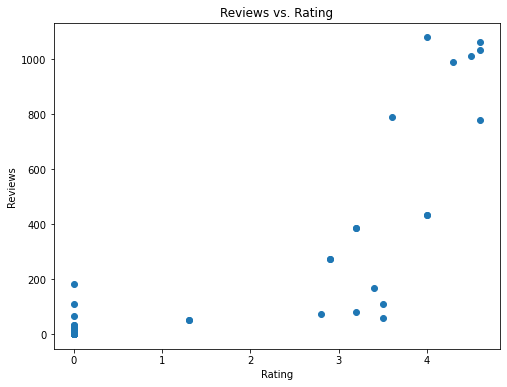

In [27]:
#visualize the relationship between Reviews and rating
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(car_info['Rating'], car_info['Reviews'])
plt.title('Reviews vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

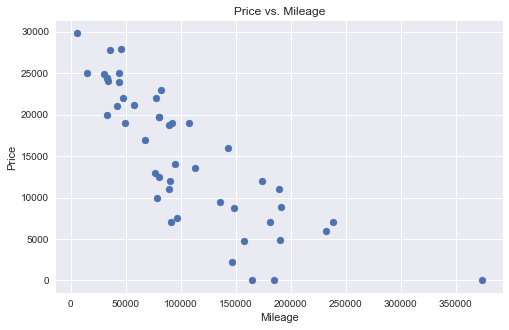

In [28]:
#visualize the relationship between price and mileage
import matplotlib.pyplot as plt

# Set the plot style
plt.style.use('seaborn') 

plt.figure(figsize=(8, 5))
plt.scatter(car_info['Mileage'], car_info['Price'])
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [29]:
correlation_matrix = car_info[['Rating', 'Reviews', 'Price', 'Mileage', 'Age']].corr()
correlation_matrix

,Rating,Reviews,Price,Mileage,Age
Rating,1.000000,0.815831,-0.095072,-0.074375,0.202531
Reviews,0.815831,1.000000,-0.015709,-0.070530,0.094946
Price,-0.095072,-0.015709,1.000000,-0.813666,-0.940251
Mileage,-0.074375,-0.070530,-0.813666,1.000000,0.705926
Age,0.202531,0.094946,-0.940251,0.705926,1.000000


In [30]:
#depreciation - regression
import pandas as pd
import statsmodels.api as sm

X = car_info['Age']
y = car_info['Price']

X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.OLS(y, X)  # Create an ordinary least squares (OLS) model
results = model.fit()  # Fit the model

# Get the depreciation rate
depreciation_rate = results.params['Age']
print("Depreciation Rate:", depreciation_rate)

Depreciation Rate: -1064.5940725475468


In [31]:
# Assuming you have a DataFrame called "car_info" with columns "Age", "Mileage", and "Price"
X = car_info[['Age', 'Mileage']]
y = car_info['Price']

X = sm.add_constant(X)  # Add a constant term to the predictor variables
model = sm.OLS(y, X)  # Create an ordinary least squares (OLS) model
results = model.fit()  # Fit the model

# Get the depreciation rate for Age and Mileage
depreciation_rate_age = results.params['Age']
depreciation_rate_mileage = results.params['Mileage']
print("Depreciation Rate (Age):", depreciation_rate_age)
print("Depreciation Rate (Mileage):", depreciation_rate_mileage)

Depreciation Rate (Age): -825.7378287168704
Depreciation Rate (Mileage): -0.03428745006938217
